In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("output/file_metrics.csv")

# Remove a local directory from the "filename" column
df["filename"] = df["filename"].str.replace(
    "/Users/josh/SecurityAnalytics/development/", "", regex=False
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   filename           1468 non-null   object 
 1   sha1               1468 non-null   object 
 2   bytes              1468 non-null   int64  
 3   lines              1468 non-null   int64  
 4   avg_line_len       1468 non-null   float64
 5   max_line_len       1468 non-null   int64  
 6   non_ascii_ratio    1468 non-null   float64
 7   binary_like        1468 non-null   bool   
 8   enc_total_matched  1468 non-null   int64  
 9   enc_max_run        1468 non-null   int64  
 10  enc_fraction       1468 non-null   float64
 11  enc_hits_base64    1468 non-null   int64  
 12  enc_hits_hexbytes  1468 non-null   int64  
 13  enc_hits_unicode   1468 non-null   int64  
 14  num_tokens_lang    1468 non-null   int64  
 15  k_shingle          1468 non-null   int64  
 16  num_shingles       1468 

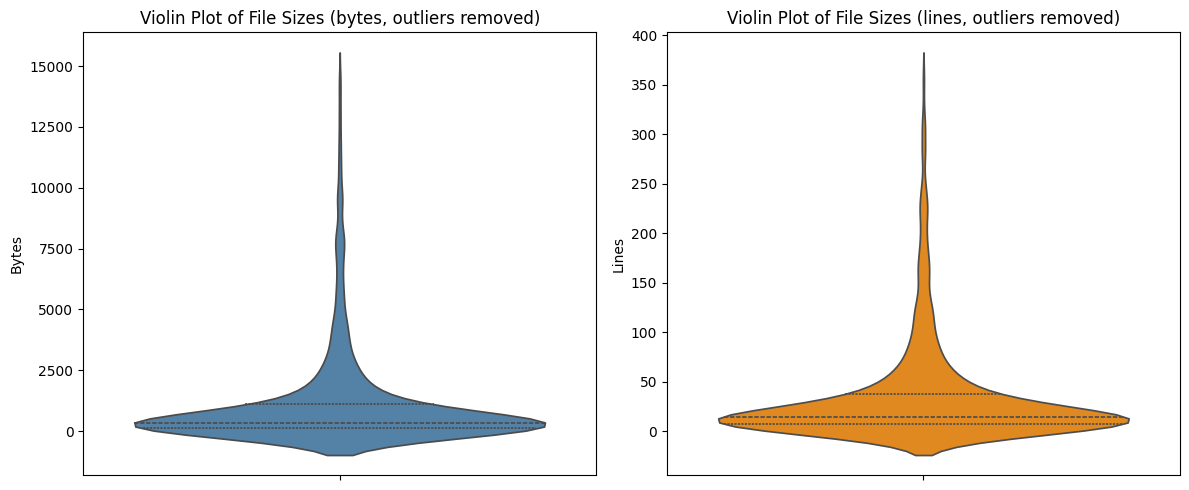

In [ ]:
bytes_cutoff = df['bytes'].quantile(0.95)
lines_cutoff = df['lines'].quantile(0.95)

df_filtered = df[(df['bytes'] <= bytes_cutoff) & (df['lines'] <= lines_cutoff)]

plt.figure(figsize=(12,5))

# Violin plot for bytes
plt.subplot(1,2,1)
sns.violinplot(y=df_filtered['bytes'], color="steelblue", inner="quartile")
plt.title("Violin Plot of File Sizes (bytes, outliers removed)")
plt.ylabel("Bytes")

# Violin plot for lines
plt.subplot(1,2,2)
sns.violinplot(y=df_filtered['lines'], color="darkorange", inner="quartile")
plt.title("Violin Plot of File Sizes (lines, outliers removed)")
plt.ylabel("Lines")

plt.tight_layout()
plt.show()

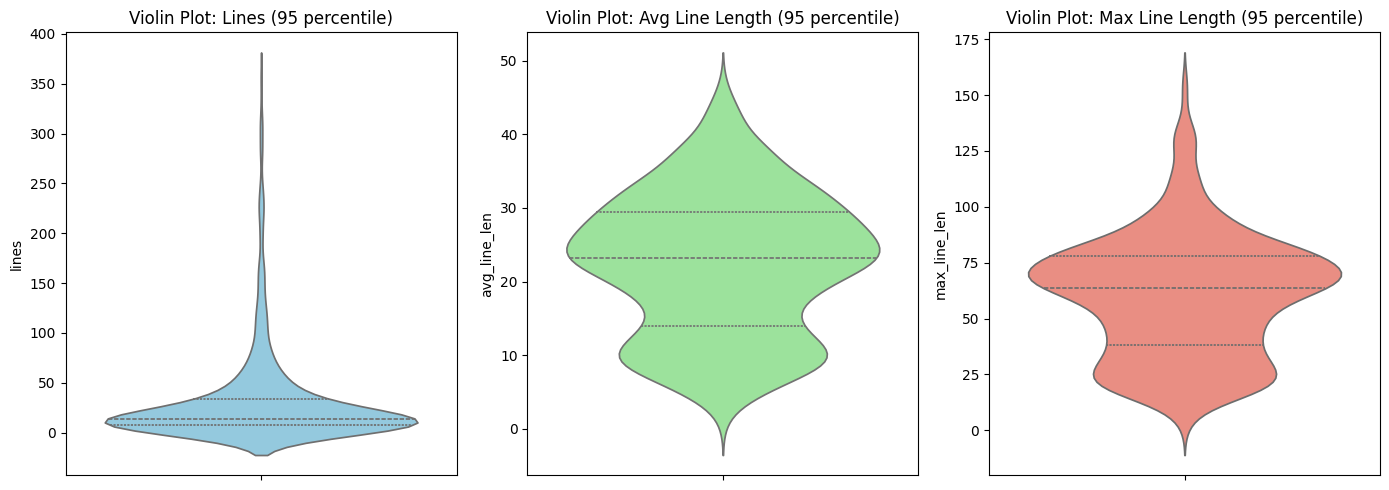

In [44]:
# Outlier clipping thresholds
lines_cut = df['lines'].quantile(0.95)
avg_cut   = df['avg_line_len'].quantile(0.95)
max_cut   = df['max_line_len'].quantile(0.95)

df_filtered = df[
    (df['lines'] <= lines_cut) &
    (df['avg_line_len'] <= avg_cut) &
    (df['max_line_len'] <= max_cut)
]

plt.figure(figsize=(14,5))

# Violin plot for lines
plt.subplot(1,3,1)
sns.violinplot(y=df_filtered['lines'], color="skyblue", inner="quartile")
plt.title("Violin Plot: Lines (95 percentile)")

# Violin plot for avg_line_len
plt.subplot(1,3,2)
sns.violinplot(y=df_filtered['avg_line_len'], color="lightgreen", inner="quartile")
plt.title("Violin Plot: Avg Line Length (95 percentile)")

# Violin plot for max_line_len
plt.subplot(1,3,3)
sns.violinplot(y=df_filtered['max_line_len'], color="salmon", inner="quartile")
plt.title("Violin Plot: Max Line Length (95 percentile)")

plt.tight_layout()
plt.show()


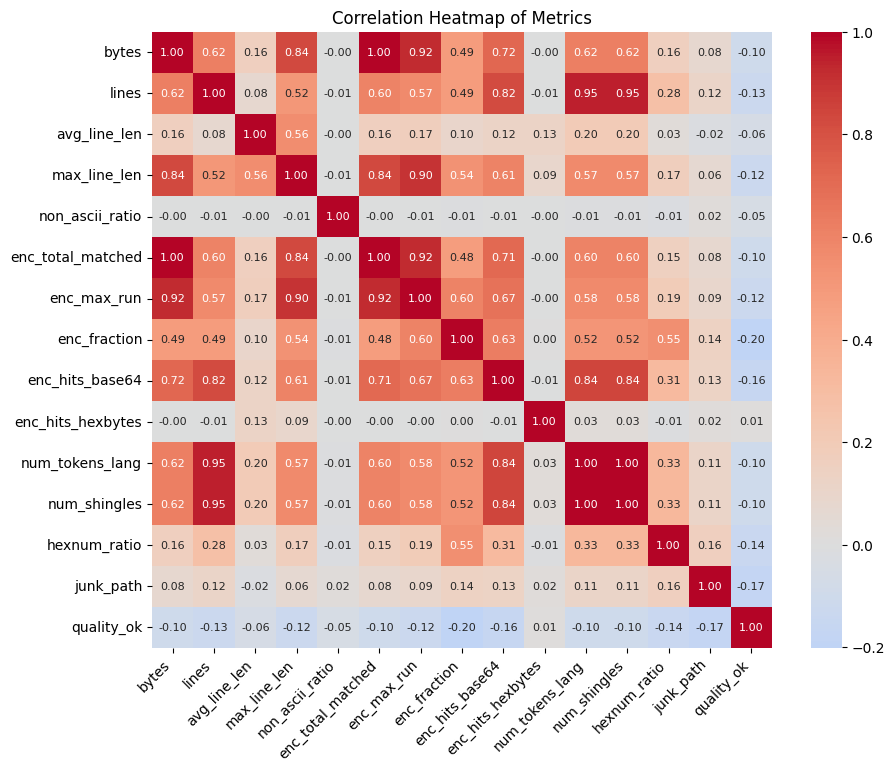

In [ ]:
plt.figure(figsize=(10,8))
drop_columns = ['filename','sha1','num_tokens_model', 'binary_like', 'enc_hits_unicode', 'k_shingle']
corr = df.drop(columns=drop_columns).corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 8}, center=0)
plt.title("Correlation Heatmap of Metrics")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [22]:
df.describe()

,bytes,lines,avg_line_len,max_line_len,non_ascii_ratio,enc_total_matched,enc_max_run,enc_fraction,enc_hits_base64,enc_hits_hexbytes,enc_hits_unicode,num_tokens_lang,k_shingle,num_shingles,hexnum_ratio,num_tokens_model
count,1.468000e+03,1468.000000,1468.000000,1468.000000,1468.000000,1.468000e+03,1468.000000,1468.000000,1468.000000,1468.000000,1468.0,1468.000000,1468.0,1468.000000,1468.000000,0.0
mean,7.240141e+04,179.846049,63.528740,284.284741,0.000515,6.798897e+04,194.434605,0.036674,24.423025,0.002725,0.0,584.049046,5.0,580.090599,0.013885,NaN
std,8.851500e+05,1009.152993,803.513819,2100.291516,0.009638,8.732492e+05,1904.396944,0.152098,180.835172,0.063895,0.0,2314.145447,0.0,2314.134998,0.047715,NaN
min,3.000000e+00,1.000000,1.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.0,0.000000,0.000000,NaN
25%,1.250000e+02,8.000000,16.067500,41.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,27.000000,5.0,23.000000,0.000000,NaN
50%,3.780000e+02,16.000000,24.260000,67.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,68.000000,5.0,64.000000,0.000000,NaN
75%,1.448250e+03,47.000000,31.325000,81.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,229.250000,5.0,225.250000,0.000000,NaN
max,1.360330e+07,11290.000000,28677.000000,28677.000000,0.333333,1.339724e+07,25603.000000,0.995897,2048.000000,2.000000,0.0,23604.000000,5.0,23600.000000,0.394892,NaN


In [5]:
# StarCoder-like thresholds (tune if needed)
MAX_BYTES         = 200_000
MAX_NONASCII      = 0.20
ENC_MAX_RUN_CHARS = 1024
ENC_MAX_FRACTION  = 0.50
MAX_LINES_TOTAL   = 100_000
MAX_LINE_AVG_LEN  = 100
MAX_LINE_MAX_LEN  = 1_000
MIN_TOKENS_LANG   = 40      # language-token gate (Cryptol tokenizer)
MAX_TOKENS_LANG   = 10_000  # optional upper bound
MIN_TOKENS_MODEL  = 32      # only if you’ve populated num_tokens_model
MAX_HEXNUM_RATIO  = 0.20

In [6]:

# --- exact dedup (keep first occurrence of each sha1) ---
# mark duplicates (True means "is duplicate" => drop later)
dup_mask = df.duplicated(subset=["sha1"], keep="first")

# --- encoded data (StarCoder) ---
enc_mask = (df["enc_max_run"] > ENC_MAX_RUN_CHARS) | (df["enc_fraction"] > ENC_MAX_FRACTION)

# --- long-line filters (StarCoder) ---
longline_mask = (
    (df["lines"] > MAX_LINES_TOTAL) |
    (df["avg_line_len"] > MAX_LINE_AVG_LEN) |
    (df["max_line_len"] > MAX_LINE_MAX_LEN)
)

# --- binary-like content ---
binary_mask = df["binary_like"].fillna(False)

# --- non-ascii density ---
nonascii_mask = df["non_ascii_ratio"].fillna(0) > MAX_NONASCII

# --- size guardrail (bytes) ---
bytes_mask = df["bytes"].fillna(0) > MAX_BYTES

# --- language-token bounds ---
lang_small_mask = df["num_tokens_lang"].fillna(0) < MIN_TOKENS_LANG
lang_large_mask = df["num_tokens_lang"].fillna(0) > MAX_TOKENS_LANG

# --- shingles exist (needed for Jaccard) ---
no_shingles_mask = df["num_shingles"].fillna(0) <= 0

# --- numeric/hex blob concentration ---
hexnum_mask = df["hexnum_ratio"].fillna(0) > MAX_HEXNUM_RATIO

# --- model-token gate (only apply where available) ---
if "num_tokens_model" in df.columns:
    model_small_mask = df["num_tokens_model"].fillna(np.inf) < MIN_TOKENS_MODEL
else:
    model_small_mask = pd.Series(False, index=df.index)


In [7]:
# Combine all hard-drop reasons
drop_mask = (
    dup_mask |
    enc_mask |
    longline_mask |
    binary_mask |
    nonascii_mask |
    bytes_mask |
    lang_small_mask |
    lang_large_mask |
    no_shingles_mask |
    hexnum_mask |
    model_small_mask
)

# Optional: compute a human-readable fail reason (first rule that tripped)
def first_reason(i):
    if dup_mask.iat[i]:          return "exact_duplicate"
    if enc_mask.iat[i]:          return "encoded_data"
    if longline_mask.iat[i]:     return "long_lines"
    if binary_mask.iat[i]:       return "binary_like"
    if nonascii_mask.iat[i]:     return "too_much_nonascii"
    if bytes_mask.iat[i]:        return "too_large_bytes"
    if lang_small_mask.iat[i]:   return "too_few_lang_tokens"
    if lang_large_mask.iat[i]:   return "too_many_lang_tokens"
    if no_shingles_mask.iat[i]:  return "no_shingles"
    if hexnum_mask.iat[i]:       return "hexnum_blob"
    if model_small_mask.iat[i]:  return "too_few_model_tokens"
    return "ok"

df = df.copy()
df["quality_ok"] = ~drop_mask
df["fail_reason"] = [first_reason(i) for i in range(len(df))]


In [8]:
dedup_cols = [
    "filename", "sha1",
    # size/lines
    "bytes", "lines", "avg_line_len", "max_line_len",
    # content/encoding
    "non_ascii_ratio", "binary_like",
    "enc_total_matched", "enc_max_run", "enc_fraction",
    "enc_hits_base64", "enc_hits_hexbytes", "enc_hits_unicode",
    # tokens/shingles
    "num_tokens_lang", "k_shingle", "num_shingles", "hexnum_ratio",
    # model tokens (optional)
    "num_tokens_model",
    # path heuristic & status
    "junk_path", "quality_ok", "fail_reason",
]

candidate_df = df.loc[df["quality_ok"], dedup_cols].reset_index(drop=True)


In [9]:
print("[summary] total:", len(df))
print("[summary] kept :", int(df["quality_ok"].sum()))
print("[summary] dropped:", int((~df["quality_ok"]).sum()))
print("[summary] drop reasons:")
print(df.loc[~df["quality_ok"], "fail_reason"].value_counts())


[summary] total: 1468
[summary] kept : 898
[summary] dropped: 570
[summary] drop reasons:
fail_reason
too_few_lang_tokens     494
encoded_data             50
hexnum_blob              13
too_many_lang_tokens      6
too_large_bytes           4
long_lines                2
too_much_nonascii         1
Name: count, dtype: int64


In [10]:
candidate_df.head()

,filename,sha1,bytes,lines,avg_line_len,max_line_len,non_ascii_ratio,binary_like,enc_total_matched,enc_max_run,...,enc_hits_hexbytes,enc_hits_unicode,num_tokens_lang,k_shingle,num_shingles,hexnum_ratio,num_tokens_model,junk_path,quality_ok,fail_reason
0,cryptol/bench/data/SHA512.cry,f6b562b76a3a09cc1f140da65bd72bc1e22725c9,4140,102,39.60,424,0.0,False,389,258,...,0,0,830,5,826,0.108434,NaN,False,True,ok
1,cryptol/bench/data/ZUC.cry,88e477e242c2e72763152534f31c4a3d2db78fa9,11699,309,36.86,80,0.0,False,0,0,...,0,0,2723,5,2719,0.029747,NaN,False,True,ok
2,cryptol/cryptol-remote-api/python/tests/crypto...,aff4f0df7b471e4047cd3cf68a727541cdd7d984,1081,51,20.22,54,0.0,False,0,0,...,0,0,265,5,261,0.000000,NaN,True,True,ok
3,cryptol/cryptol-remote-api/python/tests/crypto...,450e1ce761ca901fd9fa09c1f3e32f83a02dbb18,823,54,14.26,42,0.0,False,0,0,...,0,0,382,5,378,0.000000,NaN,True,True,ok
4,cryptol/cryptol-remote-api/python/tests/crypto...,fcfcd447659d8c989444fa400f74448eaaba94b7,282,29,8.76,30,0.0,False,0,0,...,0,0,129,5,125,0.000000,NaN,True,True,ok


In [11]:
from preprocessing.similiar_process import run_from_dataframe

# candidate_df must have an absolute-path 'filename' column.
df_files, df_pairs, similar_files = run_from_dataframe(
    candidate_df,
    filename_col="filename",
    root_dir="/Users/josh/SecurityAnalytics/development",  # prepended to filename when opening
    out_dir="minhash_outputs",
)

[info] ==== Starting MinHash/LSH over DataFrame ====
[info] params: K_SHINGLE=5, NUM_PERM=512, LSH_THRESHOLD=0.7
[info] loaded 898 files from candidate_df
[info] files indexed   : 898
[diag] total candidate pairs: 80
[diag] pairs with jaccard >= 0.7: 76
[info] wrote CSV and Parquet to minhash_outputs/

[info] ==== MinHash/LSH run summary ====
[info] files loaded  : 898
[info] files indexed : 898
[info] files with 0 shingles (tokens < 5): 0
[info] candidate pairs (from LSH) : 80
[info] pairs with Jaccard >= 0.60: 80
[info] pairs with Jaccard >= 0.70: 76
[info] pairs with Jaccard >= 0.80: 46
[info] pairs with Jaccard >= 0.85: 35
[info] pairs with Jaccard >= 0.90: 26
[info] avg Jaccard (candidates)  : 0.8463
[info] max Jaccard               : 1.0000
[info] min Jaccard               : 0.6154

[info] top pairs:
                                                                                           a                                                                                b  jaccard

In [12]:
df_files.head()

,filename,num_tokens,num_shingles,num_perm,k_shingle,minhash_hashvalues
0,cryptol-specs/Common/EC/Curve25519.cry,1263,1079,512,5,"[2009034, 81047, 4326805, 4507091, 631942, 119..."
1,cryptol-specs/Common/EC/ECInterface.cry,112,101,512,5,"[51678339, 183006, 41776937, 23555261, 5225536..."
2,cryptol-specs/Common/EC/PrimeField/PFEC.cry,2449,2233,512,5,"[1354008, 828120, 2260786, 36109, 2151603, 343..."
3,cryptol-specs/Common/EC/PrimeField/Tests/P192.cry,265,215,512,5,"[16039649, 5428130, 3072712, 29676009, 681719,..."
4,cryptol-specs/Common/EC/PrimeField/Tests/P224.cry,220,180,512,5,"[61268182, 1429633, 1009008, 29676009, 2043097..."


In [13]:
df_pairs.head()

,a,b,jaccard,a_shingles,b_shingles,union_shingles,intersect_shingles
0,saw-script/examples/misc/mutRecTest.cry,saw-script/intTests/test0000/mutRecTest.cry,1.000000,161,161,161,161
1,saw-script/examples/salsa20/Salsa20.cry,saw-script/exercises/functional-correctness/sa...,1.000000,1603,1603,1603,1603
2,saw-script/examples/simon-speck/speck-java-bug...,saw-script/examples/simon-speck/speck-java-bug...,1.000000,176,176,176,176
3,cryptol/examples/SuiteB_FFI/tests/aes-mct-ecb.cry,cryptol/tests/suiteb/aes-mct-ecb.cry,0.999515,8238,8238,8240,8236
4,cryptol/tests/regression/r03.cry,saw-script/doc/llvm-java-verification-with-saw...,0.991098,337,334,337,334


In [14]:
similar_files

['cryptol/bench/data/ZUC.cry',
 'saw-script/examples/zuc/zuc.cry',
 'cryptol/cryptol-remote-api/python/tests/cryptol/test-files/CplxQNewtype.cry',
 'cryptol/tests/regression/cplx.cry',
 'cryptol/tests/regression/cplxbroken.cry',
 'cryptol/cryptol-remote-api/python/tests/cryptol/test-files/M.cry',
 'cryptol/cryptol-remote-api/python/tests/cryptol_eval/test-files/M.cry',
 'cryptol/docs/ProgrammingCryptol/aes/AES.cry',
 'cryptol/tests/regression/AES.cry',
 'cryptol/docs/ProgrammingCryptol/enigma/ticket141.cry',
 'cryptol/tests/issues/issue141.cry',
 'cryptol/examples/DES.cry',
 'saw-script/doc/llvm-java-verification-with-saw/code/DES.cry',
 'cryptol/examples/funstuff/NQueens.cry',
 'saw-script/doc/llvm-java-verification-with-saw/code/NQueens.cry',
 'cryptol/tests/regression/r03.cry',
 'cryptol/examples/Karatsuba.cry',
 'cryptol/tests/issues/Karatsuba.cry',
 'cryptol/examples/MiniLock/prim/bv.cry',
 'saw-script/examples/ecdsa/cryptol-spec/bv.cry',
 'cryptol/examples/MiniLock/prim/mod_arith

In [15]:
from preprocessing.cluster_process import run_clustering

# If you already have df_files/df_pairs in memory:
df_keep, df_drop, df_clusters = run_clustering(
    df_files=df_files,          # from similiar_process
    df_pairs=df_pairs,          # from similiar_process
    jaccard_keep_threshold=0.70,
    out_dir="minhash_outputs",
    content_lookup=None,        # or {filename: raw_text} if you want text-derived penalties
    save_outputs=True
)

[info] clusters formed   : 838
[info] kept files        : 838
[info] dropped files     : 60
[info] wrote keep/drop/cluster CSVs to minhash_outputs/


In [18]:
from preprocessing.dataset_builder import build_datasets_from_sources

results = build_datasets_from_sources(
    metrics_csv="minhash_outputs/dedup_keep.csv",  # or minhash_files.csv
    filename_col="filename",
    root_dir="/Users/josh/SecurityAnalytics/development",  # prepended to relative filenames
    out_dir="out_datasets",
    variants="with_comments,without_comments,hybrid",

    # Agent robustness
    agent_batch_size=8,                # smaller batches help on tough files
    agent_timeout_s=45,                # fail fast if a batch hangs
    max_comment_len=4000,
    decision_cache_path="out_datasets/comment_decisions_cache.jsonl",

    # Qwen2.5-Coder-7B (4096 ctx) with prompt reserve
    context_window_tokens=4096,
    prompt_reserve_tokens=600,         # adjust to your FT prompt template
    chunk_overlap_tokens=64,
    chars_per_token=4.0,               # conservative heuristic

    # Progress cadence
    file_progress_every=20,
    save_parquet=True,
)


[hybrid-agent] loaded 57 cached decisions from out_datasets/comment_decisions_cache.jsonl
[hybrid-agent] /Users/josh/SecurityAnalytics/development/cryptol/tests/suiteb/aes-mct-ecb.cry: decided 8/16 comment chunks
[hybrid-agent] /Users/josh/SecurityAnalytics/development/cryptol/tests/suiteb/aes-mct-ecb.cry: decided 16/16 comment chunks
[hybrid-agent] /Users/josh/SecurityAnalytics/development/cryptol-specs/Common/Set.cry: decided 2/2 comment chunks
[hybrid-agent] /Users/josh/SecurityAnalytics/development/cryptol/examples/Karatsuba.cry: decided 6/6 comment chunks
[hybrid-agent] /Users/josh/SecurityAnalytics/development/cryptol-specs/Primitive/Symmetric/Cipher/Stream/ZUC.cry: decided 8/37 comment chunks
[hybrid-agent] /Users/josh/SecurityAnalytics/development/cryptol-specs/Primitive/Symmetric/Cipher/Stream/ZUC.cry: decided 16/37 comment chunks
[hybrid-agent] /Users/josh/SecurityAnalytics/development/cryptol-specs/Primitive/Symmetric/Cipher/Stream/ZUC.cry: decided 24/37 comment chunks
[hybr